In [1]:
import sys
sys.path.append('/home/lev/audio2/RadioDataset/')
import torch
import numpy as np
import matplotlib.pyplot as plt
from io0.loader import Loader
from io0.loader import Loader
from config.configloader import create_config_loader


from sampler.segment.segmentsilencesampler import SegmentSilenceSampler
from sampler.transition.transitionsegmentsilenceparameters import TransitionSegmentSilenceParametersSampler as TSSPS
from sampler.filesampler import FileSampler
from transforms.transforms import ExtractAndFade
import sys
sys.path.append('/home/lev/audio2/RadioDataset/')
from config.configloader import create_config_loader
from creator.transformchaincreator import TransformsChainCreator
from creator.transformfacory import TransformFactory

import IPython.display
import numpy as np
import json

def Audio(audio: np.ndarray, sr: int):
    """
    Use instead of IPython.display.Audio as a workaround for VS Code.
    `audio` is an array with shape (channels, samples) or just (samples,) for mono.
    """

    if np.ndim(audio) == 1:
        channels = [audio.tolist()]
    else:
        channels = audio.tolist()

    return IPython.display.HTML("""
        <script>
            if (!window.audioContext) {
                window.audioContext = new AudioContext();
                window.playAudio = function(audioChannels, sr) {
                    const buffer = audioContext.createBuffer(audioChannels.length, audioChannels[0].length, sr);
                    for (let [channel, data] of audioChannels.entries()) {
                        buffer.copyToChannel(Float32Array.from(data), channel);
                    }
            
                    const source = audioContext.createBufferSource();
                    source.buffer = buffer;
                    source.connect(audioContext.destination);
                    source.start();
                }
            }
        </script>
        <button onclick="playAudio(%s, %s)">Play</button>
    """ % (json.dumps(channels), sr))

In [2]:

from run import _init_batch_file_preprocessor, _save_configs
def preprocess(config_file):
    batch_file_preprocessor, configs = _init_batch_file_preprocessor(config_file)
    batch_file_preprocessor.preprocess()
    _save_configs(configs)

config_file = '/home/lev/audio2/RadioDataset/yaml/TIMITphonemsPrecise.yaml'
config_loader = create_config_loader()
configs = config_loader.load(config_file)



preprocess(config_file)



{'SequentialFileProcessor': {'num_files_generate': 100, 'save_dir': '/home/lev/audio2/RadioDataset/save_dir', 'save_config_dir': '/home/lev/audio2/RadioDataset/save_dir'}, 'FileSampler': {'dataset_split': 'test', 'test_size': 0.25, 'seed': 42, 'dataset_dirs': ['/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN', '/home/lev/datasets/TIMIT/data/TRAIN'], 'dataset_names': ['speech1', 'speech2', 'speech3', 'speech4', 'speech5'], 'min_datasets': 5, 'dataset_prob': [0.2, 0.2, 0.2, 0.2, 0.2], 'replace': False}, 'FileLoader': {'sample_rate': 16000, 'remove_silence': False, 'normalize': True, 'min_duration': 1, 'type': 'TIMIT'}, 'transform_chain': {'TIMITSegmentSilenceSampler': {'sampling_rate': 16000, 'final_audio_clip_duration': 1.78, 'max_total_silence_dur': 0.3, 'min_segment_silence_dur': 0}, 'TransitionSegmentSilenceParametersSampler': {'max_fade_in': 0.1, 'min_fade_in': 0.05, 'in_transiti

['audio', 'data_features', 'labels', 'parameters', 'parameters_own']


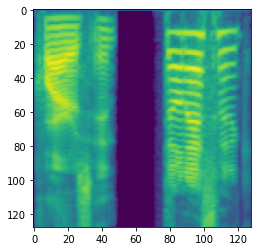

In [28]:

data = np.load('/home/lev/audio2/RadioDataset/Datasets/TIMIT_070122/train/34.npz', allow_pickle=True)
plt.plot(data['audio'][0])
Audio(data['audio'][0], 16000)
plt.imshow(data['data_features'][0])
print(list(data.keys()))

In [29]:
Audio(data['audio'][0], 16000)

In [16]:
print(list(data.keys()))

['audio', 'data_features', 'labels', 'parameters', 'parameters_own']


In [19]:
data['parameters']

array([{'init_duration': 45773, 'label': 'speech2', 'phonems': [[(0, 2776), 'h#'], [(2776, 3219), 'ix'], [(3219, 3988), 'z'], [(3988, 4501), 'dh'], [(4501, 5430), 'eh'], [(5430, 6516), 'r'], [(6516, 7745), 'eh'], [(7745, 8187), 'nx'], [(8187, 9274), 'iy'], [(9274, 11195), 'w'], [(11195, 13446), 'er'], [(13446, 13911), 'dcl'], [(13911, 14615), 'jh'], [(14615, 15415), 'uw'], [(15415, 16083), 'w'], [(16083, 16793), 'uh'], [(16793, 17086), 'dcl'], [(17086, 17253), 'd'], [(17253, 18097), 'l'], [(18097, 19785), 'ay'], [(19785, 20676), 'kcl'], [(20676, 21096), 't'], [(21096, 21514), 'ax'], [(21514, 22677), 'q'], [(22677, 24543), 'ao'], [(24543, 26011), 'f'], [(26011, 27274), 'er'], [(27274, 27906), 'ix'], [(27906, 28574), 'n'], [(28574, 29451), 'y'], [(29451, 30704), 'er'], [(30704, 32543), 'ow'], [(32543, 33485), 'n'], [(33485, 33896), 'dcl'], [(33896, 34152), 'd'], [(34152, 35037), 'ix'], [(35037, 37236), 'f'], [(37236, 39346), 'eh'], [(39346, 40355), 'n'], [(40355, 42573), 's'], [(42573, 4

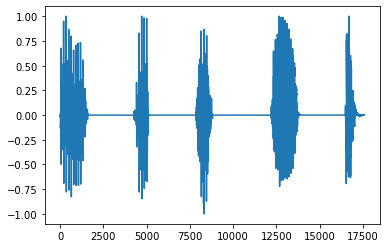

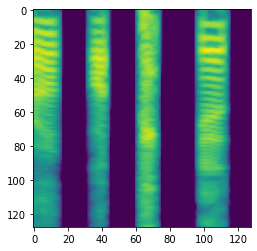

In [23]:
data = np.load('/home/lev/audio2/RadioDataset/Datasets/TIMITphonemsPreciseHARD/train/1.npz')
plt.plot(data['audio'][0])
plt.show()
plt.imshow(data['data_features'][0])
plt.show()
Audio(data['audio'][0],16000)


In [4]:
import glob
import os
x = '/home/lev/datasets/TIMIT/data/TRAIN'
glob.glob(os.path.join(x, "**/*.wav"))

[]

In [16]:
1*16000//124

129

In [40]:
np.random.randint(3, high = 4, size = 1, dtype = int)

array([3])

In [9]:
import os 
import glob
dir_path = '/home/lev/datasets/TIMIT/data/TRAIN'
data_paths = glob.glob(os.path.join(dir_path, "**/*.WAV"), recursive=True)


In [16]:
import torchaudio
a,_ = torchaudio.load(data_paths[0], normalize=True)
b,_ = torchaudio.load(data_paths[0]+'.wav', normalize=True)

In [4]:
path = '/home/lev/datasets/TIMIT/data/TRAIN/DR2/MJEB0/SX26.PHN'

with open(path, 'r') as f:
    lines = f.readlines()
    lines = [line.strip("\n").split(' ') for line in lines]
    phonems = [[(int(line[0]), int(line[1])), line[-1]] for line in lines]


In [10]:
import torchaudio

a,b = torchaudio.load('/home/lev/datasets/TIMIT/data/TRAIN/DR2/MJEB0/SX26.WAV.wav')
a.shape

torch.Size([1, 34714])

In [5]:
phonems

[[(0, 2280), 'h#'],
 [(2280, 3000), 'm'],
 [(3000, 5320), 'ow'],
 [(5320, 7330), 's'],
 [(7330, 7603), 'tcl'],
 [(7603, 9346), 'y'],
 [(9346, 11112), 'ah'],
 [(11112, 11906), 'ng'],
 [(11906, 13586), 'r'],
 [(13586, 16540), 'ay'],
 [(16540, 17640), 'z'],
 [(17640, 18422), 'q'],
 [(18422, 20261), 'er'],
 [(20261, 21639), 'l'],
 [(21639, 23519), 'iy'],
 [(23519, 24187), 'eh'],
 [(24187, 24920), 'v'],
 [(24920, 25453), 'r'],
 [(25453, 26520), 'ix'],
 [(26520, 27560), 'm'],
 [(27560, 29160), 'ao'],
 [(29160, 29960), 'r'],
 [(29960, 30560), 'n'],
 [(30560, 31456), 'ix'],
 [(31456, 32409), 'ng'],
 [(32409, 34640), 'h#']]

In [ ]:
data = np.load("/home/lev/audio2/RadioDataset/Datasets/dataset1/files/0.npz")
data['data']

In [28]:
import numpy as np
phonems[np.random.choice(len(phonems), size=1)[0]]

[(36326, 37556), 'axr']

In [ ]:
saver = WaveFeaturesSaver()
path = '/home/lev/audio2/RadioDataset/notebooks/try'
saver.save(path, signal)

In [ ]:
data = np.load("/home/lev/audio2/RadioDataset/notebooks/try.npz", allow_pickle=True)


In [ ]:
from transforms.concatenator.sequentialconcatenator import SequentialConcatenator
concatenator = SequentialConcatenator()
new_signal = concatenator.process(signals)

for i in range(5):
    signals = creator.create_audio()
    new_signal = concatenator.process(signals)
    plt.plot(new_signal.data[0])
    plt.show()

In [ ]:
new_signal.name

In [ ]:
plt.plot(new_signal.data[0])


In [ ]:
silences_lengths  = signals[0].parameters['silences_lengths']

In [ ]:
import torch
torch.zeros((1,silences_lengths[0]))


In [ ]:
n = 9
a = [1]*n
b = [2]*(n-1)
new = []
for idx in range(n):
    new.append(a[idx])
    if idx == n-1:
        pass
    else:
        new.append(b[idx])



In [ ]:
new

In [ ]:
from sampler.sampler import FirstSampler

config_file = '/home/lev/audio/RadioDataset/config.yaml'
config_loader = create_config_loader()
configs = config_loader.load(config_file)





In [ ]:
from transforms.transforms import ExtractAndFade


In [ ]:
signals[0].parameters


In [ ]:
import copy
from dataclasses import dataclass, field
from typing import Dict, Tuple
from collections import defaultdict

def default_field(obj):
    return field(default_factory=lambda: copy.copy(obj))

@dataclass
class C:
    parameters: defaultdict(list)
    
    

In [ ]:
a1 = C({1:1})
a2 = C({None:None})
a1.parameters['1'] = 1
a2.parameters['2'] = 2

print(a1.parameters)
print(a2.parameters)

In [ ]:
transition_parameters,wave_lst = creator.create_audio()
original = transform.extractor.extract(wave_lst[0], transition_parameters['audio_0'])
modified = transform.apply_fade(wave_lst[0], transition_parameters['audio_0'])


plt.plot(original)
plt.show()
plt.plot(modified)

In [ ]:
a = modified.view(1,-1)
a.squeeze(0)
a.shape

In [ ]:

scaler = MinMaxScaler()



plt.plot(scaler.process(processed_audio['audio_0'])[0])

In [ ]:
import matplotlib.pyplot as plt
plt.plot(processed_audio['audio_0'][0])

In [ ]:
processed_audio['audio_0'][0]

In [ ]:
# config_file = '/home/lev/audio/RadioDataset/config.yaml'
# config_loader = create_config_loader()
# configs = config_loader.load(config_file)
# creator = Creator(config_file)

# segments_lst,silences_lengths_lst = [],[]
# for idx in range(2500):
    
#     segments, silences_lengths = creator.create_audio()

#     segments_lst.extend(list(map(lambda x: x[1]-x[0], segments)))
#     silences_lengths_lst.extend(silences_lengths)

In [ ]:
config_file = '/home/lev/audio/RadioDataset/config.yaml'
config_loader = create_config_loader()
configs = config_loader.load(config_file)
creator = Creator(config_file)

transition_parameters, processed_audio = creator.create_audio()

In [ ]:
creator.create_audio()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(segments_lst)
plt.show()
plt.hist(silences_lengths_lst)
plt.show()

In [ ]:
file_sampler = FileSampler(configs['sampler'])
file_loader = Loader(configs['loader'])


In [ ]:
files,_ = file_sampler.sample_files()
wav_lst, wav_stat = file_loader.seq_load(files)
#params = TransGenerator.get_transition_params(wav_stat)

In [ ]:
files

In [ ]:
sum([i[1]-i[0] for i in params['segments']])/22050

In [ ]:
params

In [ ]:
wav_stat

In [ ]:
import numpy as np
n_audios = len(params["audio_lengths"]) 
segments = []
reserved_time = params['min_segment_length']*n_audios + np.sum(params["time_gaps"])
assert reserved_time< params['final_audio_clip_length']
spare_time = reserved_time - params['final_audio_clip_length']

for idx, audio_length in enumerate(params["audio_lengths"]):


    high = (audio_length+1) - params['min_segment_length']
    start_seg = np.random.randint(low=0, high=high)

    high = max(params['min_segment_length'], spare_time)+1
    point = np.random.randint(low=0, high=high)
    spare_time -= point
    end_seg = start_seg + point

    #end_seg = check_dur(start_seg, end_seg, min_seg_duration + min_seg_duration)
    assert end_seg <= audio_length
    
    segments.append((start_seg, end_seg))
params['segments'] = segments


In [ ]:
sum([i[1]-i[0] for i in params['segments']])/22050

In [ ]:

delta = np.sum(params["time_gaps"][idx:]) + min_seg_duration * (n_audios - (idx+1))

In [ ]:
# sr = 22050
# n_silences = 3
# s_min = 1 * sr
# s_total = 5 * sr
# spare_time = s_total - n_silences*s_min
# silences_res = []
trial = []
sr = 22050
silence_total = 3.5 * sr 
s_delta_lst = []
for _ in range(1000):
    n_silences = 3
    s_min = 1 * sr
    minimum_silence = n_silences*s_min
    s_total_curr = np.random.randint(low=minimum_silence, high=silence_total+1)
    spare_time = s_total_curr - n_silences*s_min
    silences_res = []
    for _ in range(n_silences):
        #s_curr = np.random.randint(low=s_min, high=spare_time)
        s_delta = np.random.randint(low=0, high=spare_time+1)
        spare_time = spare_time - s_delta
        s_duration = s_min + s_delta
        silences_res.append(s_duration)
    trial.append(np.sum(silences_res)/sr)


import matplotlib.pyplot as plt
plt.hist(np.array(trial), bins=10)

In [ ]:
total_audio_duration = 7 * sr
min_segment_dur = 1.5 * sr
silence_duration = 2*sr
#silence_duration= np.random.randint(low=1*sr, high=2*sr)
n_segments = 3
spare_time = total_audio_duration - (n_segments*min_segment_dur + silence_duration)
segments_lengts = []
for idx in range(n_segments):
    if idx == n_segments-1:
        delta = spare_time
    else:
        delta = np.random.randint(low=0, high=spare_time+1)

    segments_lengts.append(min_segment_dur+delta)
    spare_time -= delta
    print('segments_lengts=',np.sum(segments_lengts))
    print('spare_time=',spare_time)

print('Final segments length:', (np.sum(segments_lengts)+silence_duration)/sr)

In [ ]:
class SilenceSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        # Parameters to generate silence
        self.s_total = int(self.configs['max_total_silence_dur']*self.sr)
        self.s_min = int(self.configs['minimum_segment_silence_dur']*self.sr)


    def silence_(self, silences_number, random_max_silence=True):
        silence_segments = []
        min_silence = self.sr * silences_number
        if random_max_silence:
            s_total = np.random.randint(low=min_silence, high=self.s_total+1)
        else:
            s_total = self.s_total

        spare_time = s_total - min_silence 

        for _ in range(silences_number):
            # sample duration of the silence
            # total segment silence duaration = s_min + s_delta
            s_delta = np.random.randint(low=0, high=spare_time+1)

            # update spare time
            spare_time = spare_time - s_delta
            silence_segments.append(s_min + s_delta)
            
        # shuffle silences 
        np.random.shuffle(silence_segments)
        self.silence_property_check_(silence_segments)
        return silence_segments

    def silence_property_check_(self, arr):
        arr = np.array(arr)
        assert np.all(arr >= self.s_min), f"Minimum silence segment error {arr}"
         
class SegmentSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        self.audio_total_dur = self.configs['audio_total_dur']*self.sr
        self.segment_min = self.configs['segment_min']*self.sr

    def get_segments(self, silences_lengths, audio_lengths):
        
        segments_lengths = self.get_segments_lengths(audio_lengths, silences_lengths)
        segments = self.segments_(audio_lengths, segments_lengths)
        self.check_segments_(segments, silences_lengths)
        return segments

    def get_segments_lengths(self, audio_lengths, silences_lengths):
        segments_number = len(audio_lengths)
        segments_lengths = []
        silence_duration = np.sum(silences_lengths)
        spare_time = int(self.audio_total_dur - (segments_number*self.segment_min + silence_duration))
        

        for idx in range(segments_number):
            if idx == segments_number-1:
                # how to avoid case when all audios equal to minimum length?
                # If spare time greater then last audio duration
                # Equally distribute 
                print("spare_time", spare_time)
                print("audio_lengths[idx]", audio_lengths[idx])
                print("silences_lengths", silences_lengths)
                print("spare_time", spare_time)
                spare_time, silences_lengths = self.check_last_audio_length(spare_time,
                                                                            audio_lengths[idx],
                                                                            silences_lengths)
                                                                            
                s_delta = spare_time
            else:
                # chose right bound to consider the case
                # when audio duration is equal to minimum segment length
                high = min(spare_time+1, audio_lengths[idx] - self.segment_min + 1)
                s_delta = np.random.randint(low=0, high=high)

            segments_lengths.append(self.segment_min + s_delta)
            spare_time -= s_delta
        return segments_lengths
        
    def segments_(self, audio_lengths, segments_lengths):
        segments = []
        for audio_length, seg_length in zip(audio_lengths, segments_lengths):
            print("segments_lengths", segments_lengths)
            print("audio_lengths", audio_lengths)
            print("audio_length - seg_length+1",audio_length - seg_length+1)
            start = np.random.randint(low=0, high=audio_length - seg_length+1)
            end = int(start + seg_length)
            segments.append( (start, end) )
        return segments
    
    def check_last_audio_length(self, spare_time, last_audio_length, silence_duration):
        if spare_time > last_audio_length:
            distribute_time = last_audio_length - spare_time
            add_silence = int(distribute_time/len(silence_duration))/len(silence_duration)
            silence_duration = [silence + add_silence for silence in silence_duration]

            spare_time -= distribute_time
        return  spare_time, silence_duration



    def check_segments_(self, segments, silences_length):
        segments_lenths = np.array(list(map(lambda x: x[1] - x[0], segments)))
        curr_audio_total_duation = (np.sum(segments_lenths) + np.sum(silences_length))
        assert np.all(segments_lenths >= self.segment_min), f" Some of the segments smaller then minimum duration {segments_lenths}, minimum duration={self.segment_min}"
        assert curr_audio_total_duation == self.audio_total_dur, f"Total duration is wrong: {curr_audio_total_duation} != {self.audio_total_dur}"






In [ ]:

# segments_lst = []
# for _ in range(10000):
#     n_audio = np.random.randint(low=2, high=5)
#     audio_lengths = [np.random.randint(low=22050, high=10e5) for _ in range(n_audio)]


#     configs_seg = {'sr':22050,
#             'audio_total_dur': n_audio+3.5,
#             'segment_min':1}

#     configs_silence = {'sr':22050,
#             'max_total_silence_dur': 3.5,
#             'minimum_segment_silence_dur':0.2,
#     }
#     # audio total duration have to be greater or equal to segment_min+max_total_silence_dur

#     seg_sampler = SegmentSampler(configs_seg)
#     s_generator = SilenceSampler(configs_silence)

#     s = s_generator.silence_(silences_number = n_audio-1)
#     segments = seg_sampler.get_segments(silences_lengths=s, audio_lengths=audio_lengths)
#     segments_lst.extend(list(map(lambda x: x[1] -x[0], segments)))
# plt.hist(segments_lst)

In [ ]:
seg_sampler.check_last_audio_length(spare_time, last_audio_length=55086,silence_duration= [28686])



#### Working silence and segment sampler

In [ ]:

class SilenceSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        # Parameters to generate silence
        self.s_total = int(self.configs['max_total_silence_dur']*self.sr)
        self.s_min = int(self.configs['minimum_segment_silence_dur']*self.sr)


    def silence_(self, silences_number, random_max_silence=True):
        silence_segments = []
        min_silence = self.sr * silences_number * self.s_min
        if random_max_silence:
            s_total = np.random.randint(low=min_silence, high=self.s_total+1)
        else:
            s_total = self.s_total

        spare_time = s_total - min_silence 

        for _ in range(silences_number):
            # sample duration of the silence
            # total segment silence duaration = s_min + s_delta
            s_delta = np.random.randint(low=0, high=spare_time+1)

            # update spare time
            spare_time = spare_time - s_delta
            silence_segments.append(s_min + s_delta)
            
        # shuffle silences 
        np.random.shuffle(silence_segments)
        self.silence_property_check_(silence_segments)
        return silence_segments

    def silence_property_check_(self, arr):
        arr = np.array(arr)
        assert np.all(arr >= self.s_min), f"Minimum silence segment error {arr}"

class SegmentSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        self.audio_total_dur = self.configs['audio_total_dur']*self.sr
        self.segment_min = self.configs['segment_min']*self.sr

    def get_segments(self, silences_lengths, audio_lengths):
        
        segments_lengths, silences_lengths = self.get_segments_lengths(audio_lengths, silences_lengths)
        segments = self.segments_(audio_lengths, segments_lengths)
        self.check_segments_(segments, silences_lengths)
        return segments

    def get_segments_lengths(self, audio_lengths, silences_lengths):
        segments_number = len(audio_lengths)
        segments_lengths = []
        silence_duration = np.sum(silences_lengths)
        spare_time = int(self.audio_total_dur - (segments_number*self.segment_min + silence_duration))
        

        for idx in range(segments_number):
            
            # chose right bound to consider the case
            # when audio duration is equal to minimum segment length
            high = min(spare_time+1, audio_lengths[idx] - self.segment_min + 1)
            s_delta = np.random.randint(low=0, high=high)

            segments_lengths.append(self.segment_min + s_delta)
            spare_time -= s_delta

        
        silences_lengths = self.silence_update(spare_time, silences_lengths, segments_lengths)
        return segments_lengths, silences_lengths
    

    def segments_(self, audio_lengths, segments_lengths):
        segments = []
        for audio_length, seg_length in zip(audio_lengths, segments_lengths):
            # print("segments_lengths", segments_lengths)
            # print("audio_lengths", audio_lengths)
            # print("audio_length - seg_length+1",audio_length - seg_length+1)
            start = np.random.randint(low=0, high=audio_length - seg_length+1)
            end = int(start + seg_length)
            segments.append( (start, end) )
        return segments

    def silence_update(self, spare_time, silences_lengths, segments_lengths):
        add_silence = (spare_time//len(silences_lengths)) + 1
        silences_lengths = [silence + add_silence for silence in silences_lengths]
        curr_audio_total_durr = np.sum(segments_lengths) + np.sum(silences_lengths)
        if curr_audio_total_durr > self.audio_total_dur:
            silences_lengths[-1] = silences_lengths[-1] - (curr_audio_total_durr - self.audio_total_dur)
       
        return silences_lengths




    def check_segments_(self, segments, silences_length):
        segments_lenths = np.array(list(map(lambda x: x[1] - x[0], segments)))
        curr_audio_total_duation = (np.sum(segments_lenths) + np.sum(silences_length))
        assert np.all(segments_lenths >= self.segment_min), f" Some of the segments smaller then minimum duration {segments_lenths}, minimum duration={self.segment_min}"
        assert curr_audio_total_duation == self.audio_total_dur, f"Total duration is wrong: {curr_audio_total_duation} != {self.audio_total_dur}"






segments_lst = []
for _ in range(10000):
    n_audio = np.random.randint(low=2, high=3)
    audio_lengths = [np.random.randint(low=22050, high=10e5) for _ in range(n_audio)]


    configs_seg = {'sr':22050,
            'audio_total_dur': 2.25,
            'segment_min':0.5}

    configs_silence = {'sr':22050,
            'max_total_silence_dur': 0.2,
            'minimum_segment_silence_dur':0.,
    }
    # audio total duration have to be greater or equal to segment_min+max_total_silence_dur

    seg_sampler = SegmentSampler(configs_seg)
    s_generator = SilenceSampler(configs_silence)

    s = s_generator.silence_(silences_number = n_audio-1)
    segments = seg_sampler.get_segments(silences_lengths=s, audio_lengths=audio_lengths)
    segments_lst.extend(list(map(lambda x: x[1] -x[0], segments)))
plt.hist(segments_lst)

# seg_sampler = SegmentSampler(configs_seg )
# segments_lengths = seg_sampler.get_segments_lengths(silences_lengths=s, audio_lengths=audio_lengths)
# seg_sampler.segments_(audio_lengths=audio_lengths, segments_lengths=segments_lengths)


In [ ]:



class SegmentSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        self.audio_total_dur = self.configs['audio_total_dur']*self.sr
        self.segment_min = self.configs['segment_min']*self.sr

    def get_segments(self, silences_lengths, audio_lengths):
        self.silences_lengths = silences_lengths
        self.audio_lengths = audio_lengths

        self.get_segments_lengths()
        segments = self.segments_()

        return segments, self.silences_lengths

    def get_segments_lengths(self,):
        segments_number = len(self.audio_lengths)
        self.segments_lengths = []
        silence_duration = np.sum(self.silences_lengths)
        spare_time = int(self.audio_total_dur - (segments_number*self.segment_min + silence_duration))
        

        for idx in range(segments_number):
            
            # chose right bound to consider the case
            # when audio duration is equal to minimum segment length
            high = min(spare_time+1, self.audio_lengths[idx] - self.segment_min + 1)
            s_delta = np.random.randint(low=0, high=high)

            self.segments_lengths.append(self.segment_min + s_delta)
            spare_time -= s_delta

        
        self.silence_update(spare_time)
        
    

    def segments_(self,):
        segments = []
        for audio_length, seg_length in zip(self.audio_lengths, self.segments_lengths):
            
            start = np.random.randint(low=0, high=audio_length - seg_length+1)
            end = int(start + seg_length)
            segments.append( (start, end) )

        self.check_segments_(segments)
        return segments

    def silence_update(self, spare_time):
        add_silence = (spare_time//len(self.silences_lengths)) + 1
        self.silences_lengths = [silence + add_silence for silence in self.silences_lengths]
        curr_audio_total_durr = np.sum(self.segments_lengths) + np.sum(self.silences_lengths)
        if curr_audio_total_durr > self.audio_total_dur:
            self.silences_lengths[-1] = self.silences_lengths[-1] - (curr_audio_total_durr - self.audio_total_dur)
       
        
    def check_segments_(self,segments):
        segments_lenths = np.array(list(map(lambda x: x[1] - x[0], segments)))
        curr_audio_total_duation = (np.sum(segments_lenths) + np.sum(self.silences_lengths))
        assert np.all(segments_lenths >= self.segment_min), f" Some of the segments smaller then minimum duration {segments_lenths}, minimum duration={self.segment_min}"
        assert curr_audio_total_duation == self.audio_total_dur, f"Total duration is wrong: {curr_audio_total_duation} != {self.audio_total_dur}"


class SilenceSampler():
    def __init__(self, configs):
        self.configs = configs

        self.sr = self.configs['sr']
        # Parameters to generate silence
        self.s_total = int(self.configs['max_total_silence_dur']*self.sr)
        self.s_min = int(self.configs['minimum_segment_silence_dur']*self.sr)


    def silence_(self, silences_number, random_max_silence=True):
        silence_segments = []
        min_silence =  silences_number * self.s_min
      
        if random_max_silence:
           
            s_total = np.random.randint(low=min_silence, high=self.s_total+1)
        else:
            s_total = self.s_total

        spare_time = s_total - min_silence 
        
        for _ in range(silences_number):
            # sample duration of the silence
            # total segment silence duaration = s_min + s_delta
            s_delta = np.random.randint(low=0, high=spare_time+1)

            # update spare time
            spare_time = spare_time - s_delta
           
            silence_segments.append(self.s_min + s_delta)
            
        # shuffle silences 
        np.random.shuffle(silence_segments)
        self.silence_property_check_(silence_segments)
        
        return silence_segments

    def silence_property_check_(self, arr):
        arr = np.array(arr)
        assert np.all(arr >= self.s_min), f"Minimum silence segment error {arr}"

segments_lst, silences_lst = [], []
for _ in range(10000):
    n_audio = np.random.randint(low=2, high=3)
    audio_lengths = [np.random.randint(low=22050, high=10e5) for _ in range(n_audio)]


    configs_seg = {'sr':22050,
            'audio_total_dur': 2.25,
            'segment_min':0.5}

    configs_silence = {'sr':22050,
            'max_total_silence_dur': 0.2,
            'minimum_segment_silence_dur':0.0,
    }
    # audio total duration have to be greater or equal to segment_min+max_total_silence_dur

    seg_sampler = SegmentSampler(configs_seg)
    s_generator = SilenceSampler(configs_silence)

    s = s_generator.silence_(silences_number = n_audio-1)
    segments, silences_lengths = seg_sampler.get_segments(silences_lengths=s, audio_lengths=audio_lengths)

    silences_lst.extend(silences_lengths)
    segments_lst.extend(list(map(lambda x: x[1] -x[0], segments)))
plt.hist(segments_lst)
plt.show()
plt.hist(silences_lst)
plt.show()



In [ ]:
silences_lst

In [ ]:
159968 < 121275.0


In [ ]:
23421/4

In [ ]:
5855*4 + 1


In [ ]:
for audio_length, seg_length in zip(audio_lengths, segments_lengths):
        start = np.random.randint(low=0, high=audio_length - seg_length+1)
        end = int(start + seg_length)
        segments.append( (start, end) )

In [ ]:
segments_lengths

In [ ]:
audio_lengths

In [ ]:
segments = seg_sampler.get_segments(silences_lengths=s, audio_lengths=audio_lengths)
(np.sum(s) + np.sum(list(map(lambda x: x[1] - x[0], segments))))/22050

In [ ]:
4.0 + 0.5024036281179138 + 3.497596371882086


In [ ]:
configs_silence = {'sr':22050,
            'max_total_silence_dur': 3.5,
            'minimum_segment_silence_dur':1,
            'silence_number':3 }
s_generator = SilenceSampler(configs)

trial = []

for _ in range(100000):
    s = s_generator.silence_(3)
    trial.append(np.sum(s)/sr)  


plt.hist(np.array(trial), bins=10)  

In [ ]:
a = [1,2,3,4] 
np.random.shuffle(a)
a

In [ ]:
sr = 22050
silence_total = 3.5 * sr 
s_delta_lst = []


for _ in range(1000):
    n_silences = 3
    s_min = 1 * sr
    minimum_silence = n_silences*s_min
    s_total_curr = np.random.randint(low=minimum_silence, high=silence_total+1)
    spare_time = s_total_curr - n_silences*s_min
    silences_res = []
    for _ in range(n_silences):
        #s_curr = np.random.randint(low=s_min, high=spare_time)
        s_delta = np.random.randint(low=0, high=spare_time+1)
        spare_time = spare_time - s_delta
        s_duration = s_min + s_delta
        silences_res.append(s_duration)
    trial.append(np.sum(silences_res)/sr)